<a href="https://colab.research.google.com/github/miguelreal90/Segmentacion-de-Comerciantes/blob/main/notebooks/Comerciantes_Bancolombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Proyecto de Comerciantes de la entidad bancaria Bancolombia(Norte de Satander)
Explorando mi curiosidad y motivado por la vasta cantidad de datos abiertos disponibles en Colombia, me sumergí en la fascinante tarea de analizar una base de datos específica relacionada con empresas en el departamento de Norte de Santander(https://www.datos.gov.co/Comercio-Industria-y-Turismo/BASE-DE-DATOS-EMPRESAS-DE-NORTE-DE-SANTANDER/w98a-ssvz/about_data). Dada la amplitud de la información, tomé la decisión de focalizar mi atención en una entidad bancaria en particular: Bancolombia.

Este enfoque selectivo permitirá una exploración detallada y específica de los datos asociados con Bancolombia en la región, proporcionando una visión más precisa y detallada de la dinámica empresarial en el departamento. A través de esta investigación, busco desentrañar patrones, identificar tendencias y extraer conocimientos valiosos que puedan contribuir a una comprensión más profunda de la actividad económica en esta área geográfica.

Este proyecto no solo representa un viaje de descubrimiento en el vasto mundo de los datos abiertos, sino también una oportunidad para aplicar herramientas avanzadas de machine learning y analítica de datos con el objetivo de obtener insights significativos y beneficios tangibles en el contexto empresarial de Norte de Santander



In [ ]:
import pandas as pd
df_bancolombia=pd.read_csv('datos_Bancolombia.csv')
df_bancolombia.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,...,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544.0,11001.0
1,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,...,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622.0,5154.0
2,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,...,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613.0,17001.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,...,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90.0,5266.0
4,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,...,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010.0,11001.0


Antes de fltrar los datos, se habian trabajado los valores nulos y duplicados, seguimos explorando los datos
Sabiendo que ya estamos en Bancolobia borramos las columnas que identifican a Bancolombia ['Tipo_Entidad','Nombre_Tipo_Entidad','Codigo_Entidad','Nombre_Entidad']

In [ ]:
columnas_a_eliminar = ['Tipo_Entidad','Nombre_Tipo_Entidad','Codigo_Entidad','Nombre_Entidad']

# Utiliza el método drop para eliminar las columnas
df_bancolombia = df_bancolombia.drop(columnas_a_eliminar, axis=1)
df_bancolombia.head()


,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544.0,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622.0,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613.0,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90.0,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010.0,11001.0


In [ ]:
df_bancolombia.isnull().sum()

Fecha_Corte                         1
Tipo_de_persona                     1
Sexo                                1
Tamaño_de_empresa                   1
Tipo_de_crédito                     1
Tipo_de_garantía                    1
Producto de crédito                 1
Plazo de crédito                    1
Tasa_efectiva_promedio_ponderada    1
margen_adicional                    1
Montos_desembolsados                1
Numero_de_creditos_desembolsados    1
Antiguedad_de_la_empresa            1
Tipo_de_Tasa                        1
Rango_monto_desembolsado            1
Clase_deudor                        1
Codigo_CIIU                         1
Codigo_Municipio                    1
dtype: int64

In [ ]:
df_bancolombia=df_bancolombia.dropna()

In [ ]:
# Convierte la columna de flotantes a enteros
df_bancolombia['Codigo_CIIU'] = df_bancolombia['Codigo_CIIU'].astype(int)
df_bancolombia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0


In [ ]:
df_bancolombia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089653 entries, 0 to 2089652
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Fecha_Corte                       object 
 1   Tipo_de_persona                   object 
 2   Sexo                              object 
 3   Tamaño_de_empresa                 object 
 4   Tipo_de_crédito                   object 
 5   Tipo_de_garantía                  object 
 6   Producto de crédito               object 
 7   Plazo de crédito                  object 
 8   Tasa_efectiva_promedio_ponderada  float64
 9   margen_adicional                  float64
 10  Montos_desembolsados              float64
 11  Numero_de_creditos_desembolsados  int64  
 12  Antiguedad_de_la_empresa          object 
 13  Tipo_de_Tasa                      object 
 14  Rango_monto_desembolsado          object 
 15  Clase_deudor                      object 
 16  Codigo_CIIU                       in

In [ ]:
df_bancolombia.describe()

,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Codigo_CIIU,Codigo_Municipio
count,2.089653e+06,2.089653e+06,2.089653e+06,2.089653e+06,2.089653e+06,2.089653e+06
mean,2.323474e+01,4.375643e-01,2.457262e+07,1.848961e+01,3.834895e+03,3.140703e+04
std,1.741541e+01,2.376324e+00,9.163119e+08,6.032009e+02,3.114790e+03,2.767537e+04
min,0.000000e+00,-9.020000e+00,1.000000e-02,1.000000e+00,1.000000e+01,5.001000e+03
25%,0.000000e+00,0.000000e+00,2.463080e+05,1.000000e+00,9.000000e+01,8.001000e+03
50%,3.485000e+01,0.000000e+00,1.119000e+06,2.000000e+00,4.641000e+03,1.787300e+04
75%,3.821000e+01,0.000000e+00,4.589712e+06,4.000000e+00,6.202000e+03,6.300100e+04
max,5.681000e+01,3.398000e+01,6.949955e+11,1.332640e+05,9.900000e+03,9.977300e+04


## Analisis de Distribucion

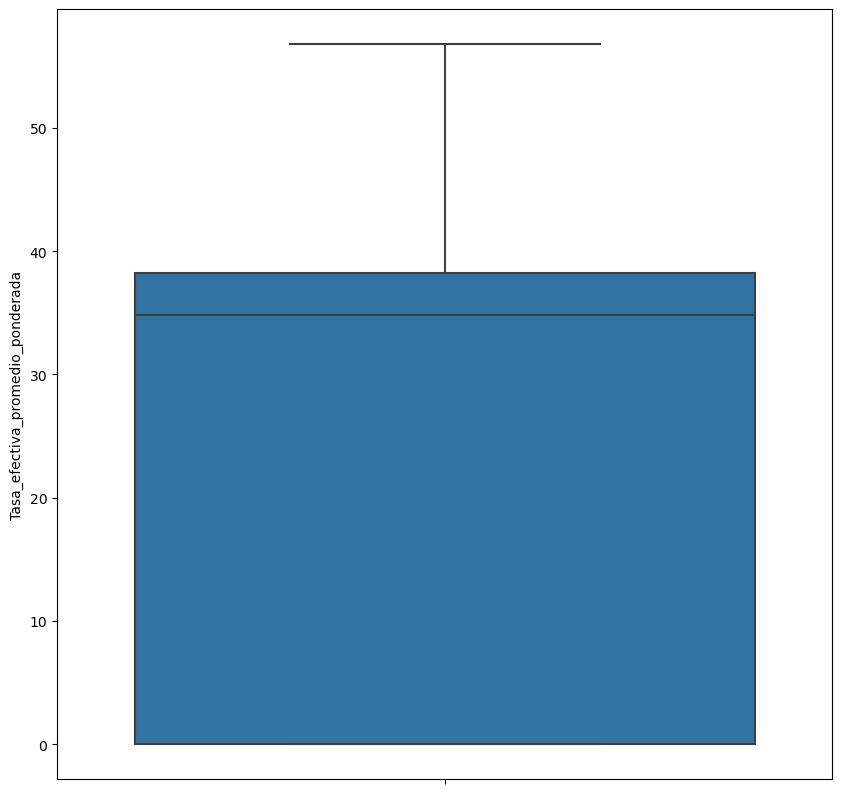

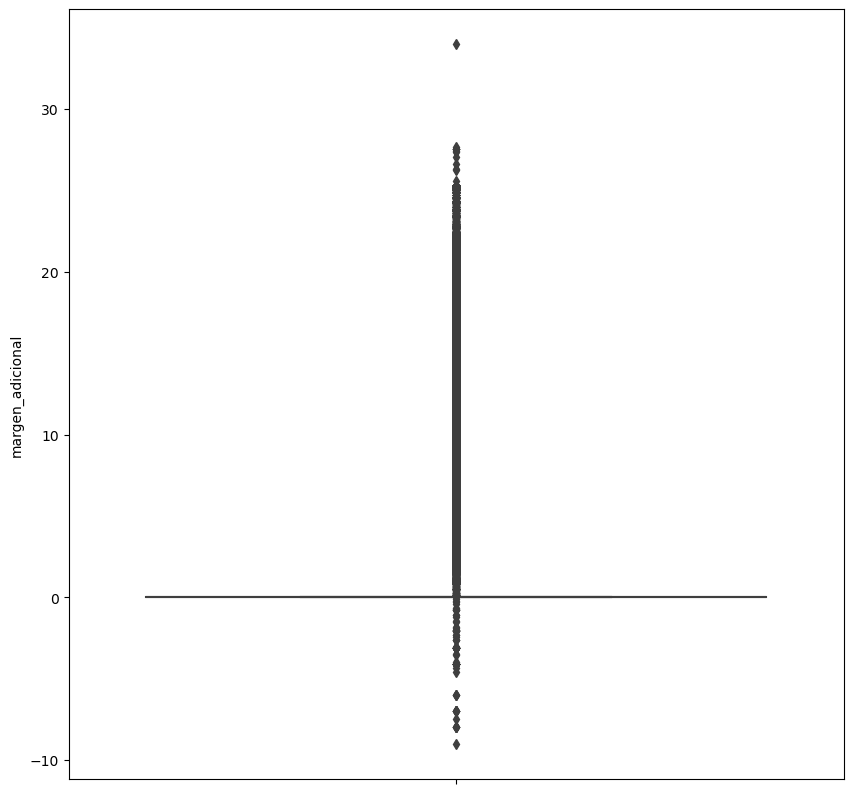

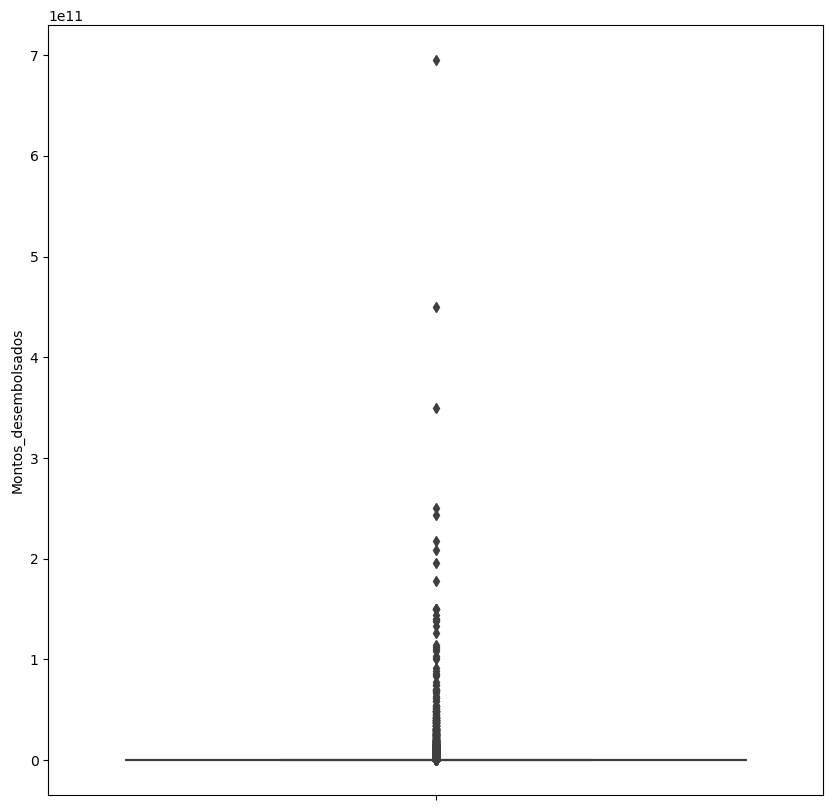

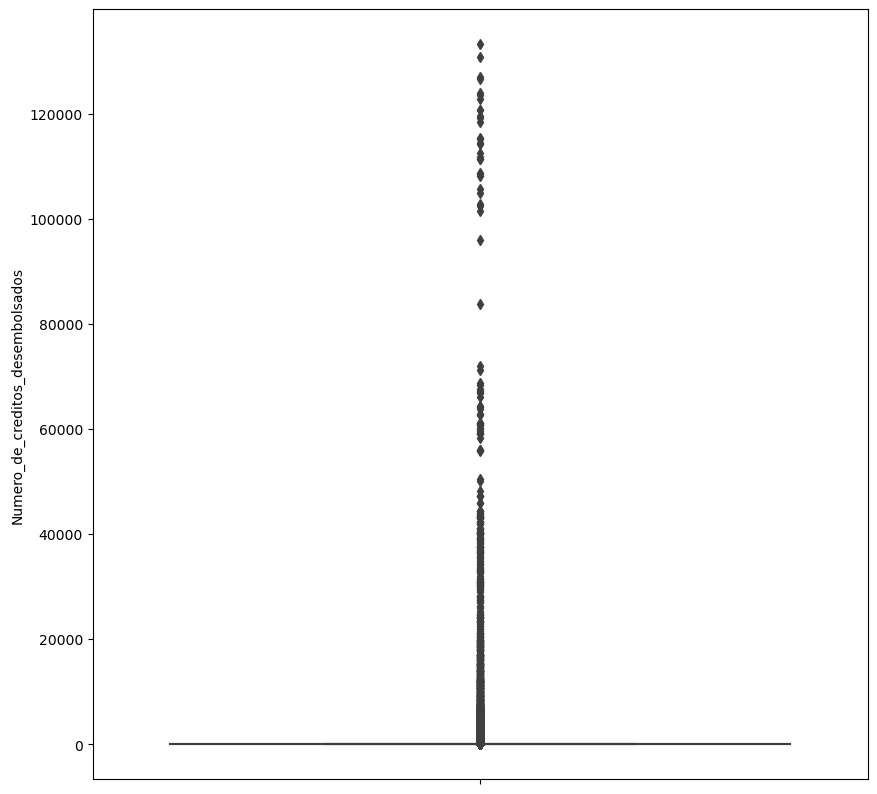

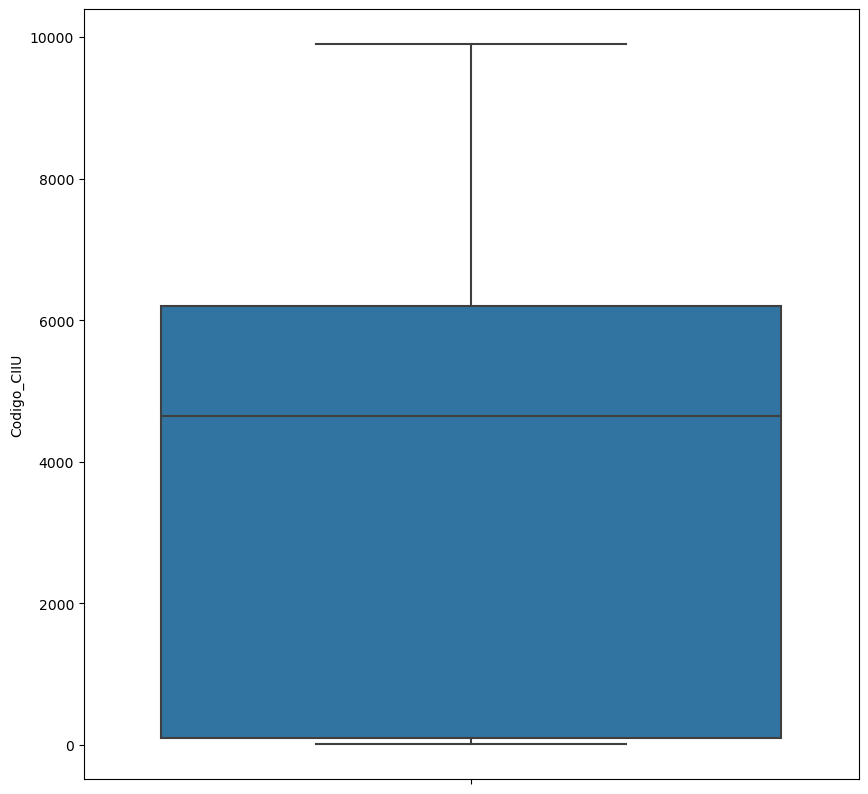

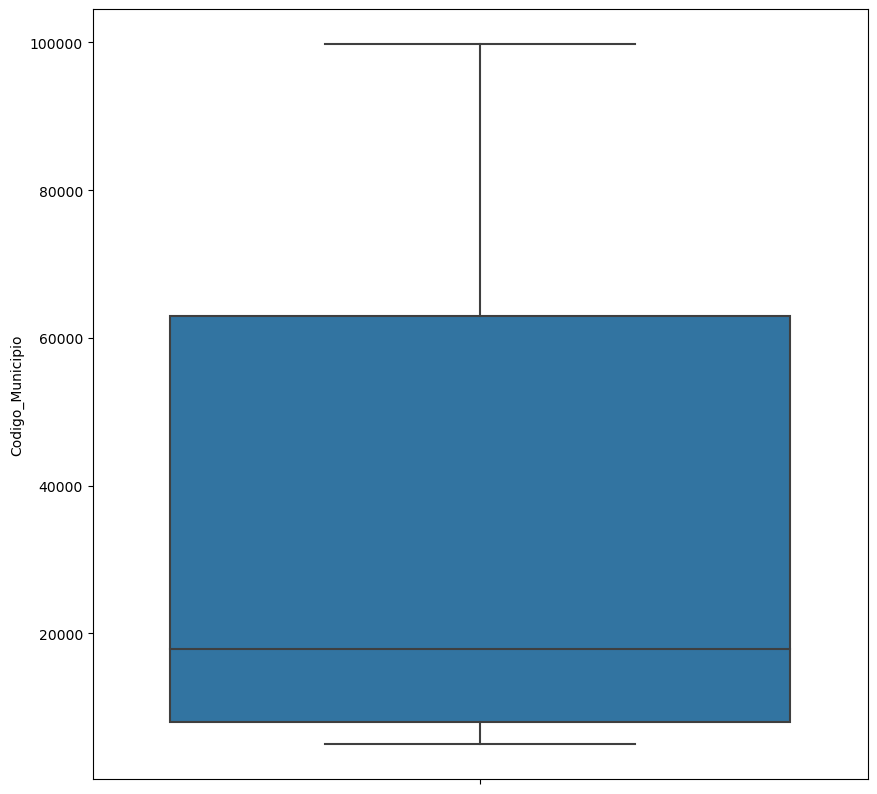

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
int_cols = df_bancolombia.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_bancolombia, y= _)
    plt.show()


## Exploramos los valores unicos de las variables tipo objeto

In [ ]:
def mostrar_conteo_valores_objeto(dataframe):
    for columna in dataframe.select_dtypes(include='object').columns:
        conteo_valores = dataframe[columna].value_counts()
        print(f"Columna: {columna}")
        print(conteo_valores)
        print("------")
mostrar_conteo_valores_objeto(df_bancolombia)

Columna: Fecha_Corte
01/12/2023    1900
06/10/2023    1873
24/11/2023    1863
20/10/2023    1775
27/10/2023    1767
17/11/2023    1760
10/11/2023    1744
03/11/2023    1715
13/10/2023    1713
22/12/2023     861
29/09/2023     810
05/01/2024     414
08/12/2023      64
29/12/2023      30
15/12/2023      30
Name: Fecha_Corte, dtype: int64
------
Columna: Tipo_de_persona
Natural     12758
Jurídica     5561
Name: Tipo_de_persona, dtype: int64
------
Columna: Sexo
Masculino    6998
Femenino     5760
No aplica    5561
Name: Sexo, dtype: int64
------
Columna: Tamaño_de_empresa
No aplica          12647
Pequeña empresa     2036
Microempresa        1567
Mediana empresa     1207
Gran empresa         862
Name: Tamaño_de_empresa, dtype: int64
------
Columna: Tipo_de_crédito
Consumo                                 12605
Comercial ordinario                      5593
Crédito productivo                         47
Vivienda                                   42
Comercial preferencial o corporativo       15

## convertimos algunas columnas a numericas

In [ ]:
# Aquí realizamos una copia de df_bancolombia
df_Bancolombia_copia = df_bancolombia.copy()
#convertir es Tipo_de_persona
#'Natural': 0, 'Jurídica': 1


# Crear un diccionario de mapeo
mapeo = {'Natural': 0, 'Jurídica': 1}

# Aplicar el mapeo a la columna Tipo_de_persona
df_Bancolombia_copia['Tipo_de_persona'] = df_Bancolombia_copia['Tipo_de_persona'].map(mapeo)
df_Bancolombia_copia['Tipo_de_persona'].value_counts()


0    43281
1    18990
Name: Tipo_de_persona, dtype: int64

In [ ]:
#convertir columna Sexo
#'Masculino': 1, 'Femenino': 2, 'No aplica': 3, 'No binario': 4
# Crear un diccionario de mapeo
mapeo_sexo = {'Masculino': 1, 'Femenino': 2, 'No aplica': 3, 'No binario': 4}

# Aplicar el mapeo a la columna 'Sexo'
df_Bancolombia_copia['Sexo'] = df_Bancolombia_copia['Sexo'].map(mapeo_sexo)
df_Bancolombia_copia['Sexo'].value_counts()

1    23930
2    19351
3    18990
Name: Sexo, dtype: int64

In [ ]:
#convertir columna Tamaño_de_empresa
# 'No aplica' : 1,'Pequeña empresa' : 2,'Microempresa' : 3,'Mediana empresa': 4,'Gran empresa' : 5
mapeo_Tamaño_de_empresa = {'No aplica' : 1,'Pequeña empresa' : 2,'Microempresa' : 3,'Mediana empresa': 4,'Gran empresa' : 5}

# Aplicar el mapeo a la columna 'Tamaño_de_empresa'
df_Bancolombia_copia['Tamaño_de_empresa'] = df_Bancolombia_copia['Tamaño_de_empresa'].map(mapeo_Tamaño_de_empresa)
df_Bancolombia_copia['Tamaño_de_empresa'].value_counts()

1    42910
2     7017
3     5150
4     4129
5     3065
Name: Tamaño_de_empresa, dtype: int64

In [ ]:
#convertir columna Tipo_de_crédito
# 'Consumo' : 1,'Comercial ordinario' :2,'Vivienda' : 3,'Crédito productivo' : 4,'Comercial preferencial o corporativo' : 5,'Comercial especial' : 6,,'Comercial tesoreria':7
mapeo_Tipo_de_credito = {'Consumo' : 1,'Comercial ordinario' :2,'Vivienda' : 3,'Crédito productivo' : 4,
'Comercial preferencial o corporativo' : 5,'Comercial especial' : 6,'Comercial tesoreria':7}

# Aplicar el mapeo a la columna 'Tipo_de_crédito'
df_Bancolombia_copia['Tipo_de_crédito'] = df_Bancolombia_copia['Tipo_de_crédito'].map(mapeo_Tipo_de_credito)
df_Bancolombia_copia['Tipo_de_crédito'].value_counts()

1    42770
2    19075
4      151
3      140
5       74
6       47
7       14
Name: Tipo_de_crédito, dtype: int64

In [ ]:
# convertir Columna Tipo_de_garantía
#'Garantia idónea o no idónea ' : 1,'Sin garantia' : 2,'Garantía  fondo nacional de garantías (FNG) o Fondo de Garantías de Antioquia (FGA)' : 3,'Garantía del fondo agropecuario de garantías (FAG)' : 4
mapeo_Tipo_de_garantía = {'Garantia idónea o no idónea' : 1 ,'Sin garantia' : 2 ,
'Garantía  fondo nacional de garantías (FNG) o Fondo de Garantías de Antioquia (FGA)' : 3 ,
'Garantía del fondo agropecuario de garantías (FAG)' : 4 }

# Aplicar el mapeo a la columna 'Tipo_de_garantía'
df_Bancolombia_copia['Tipo_de_garantía'] = df_Bancolombia_copia['Tipo_de_garantía'].map(mapeo_Tipo_de_garantía)
df_Bancolombia_copia['Tipo_de_garantía'].value_counts()

1    33437
2    28675
3      107
4       52
Name: Tipo_de_garantía, dtype: int64

In [ ]:
#converit Columna Antiguedad_de_la_empresa
#'No aplica(1)' : 1,'más de 10 años' : 2,'más de 5 y hasta 10 años' : 3,'0 a 5 años' : 4
mapeo_Antiguedad_de_la_empresa = {'No aplica(1)' : 1,'más de 10 años' : 2,'más de 5 y hasta 10 años' : 3,'0 a 5 años' : 4}

# Aplicar el mapeo a la columna 'Antiguedad_de_la_empresa'
df_Bancolombia_copia['Antiguedad_de_la_empresa'] = df_Bancolombia_copia['Antiguedad_de_la_empresa'].map(mapeo_Antiguedad_de_la_empresa)
df_Bancolombia_copia['Antiguedad_de_la_empresa'].value_counts()

1    42910
2    12563
3     4403
4     2395
Name: Antiguedad_de_la_empresa, dtype: int64

In [ ]:
# Convertir Columna Tipo_de_Tasa
#'FS' : 1,'DTF' : 2,'IB1' : 3,'IB6' : 4,'IB3' : 5,'IBE' : 6,'IPC' : 7,'IBR' : 8
mapeo_Tipo_de_Tasa = {'FS' : 1,'DTF' : 2,'IB1' : 3,'IB6' : 4,'IB3' : 5,'IBE' : 6,'IPC' : 7,'IBR' : 8}

# Aplicar el mapeo a la columna 'Tipo_de_Tasa'
df_Bancolombia_copia['Tipo_de_Tasa'] = df_Bancolombia_copia['Tipo_de_Tasa'].map(mapeo_Tipo_de_Tasa)
df_Bancolombia_copia['Tipo_de_Tasa'].value_counts()


1    59761
2     2278
3      162
4       45
5       24
6        1
Name: Tipo_de_Tasa, dtype: int64

In [ ]:
#Convertimos Columna Clase_deudor
# 'Deudor de la entidad' : 1,'Deudor nuevo en la entidad' : 2
mapeo_Clase_deudor = {'Deudor de la entidad' : 1,'Deudor nuevo en la entidad' : 2}

# Aplicar el mapeo a la columna 'Clase_deudor'
df_Bancolombia_copia['Clase_deudor'] = df_Bancolombia_copia['Clase_deudor'].map(mapeo_Clase_deudor)
df_Bancolombia_copia['Clase_deudor'].value_counts()


1    59461
2     2810
Name: Clase_deudor, dtype: int64

In [ ]:
df_Bancolombia_copia = df_Bancolombia_copia.drop('Fecha_Corte', axis=1)
df_Bancolombia_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62271 entries, 0 to 62270
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tipo_de_persona                   62271 non-null  int64  
 1   Sexo                              62271 non-null  int64  
 2   Tamaño_de_empresa                 62271 non-null  int64  
 3   Tipo_de_crédito                   62271 non-null  int64  
 4   Tipo_de_garantía                  62271 non-null  int64  
 5   Producto de crédito               62271 non-null  object 
 6   Plazo de crédito                  62271 non-null  object 
 7   Tasa_efectiva_promedio_ponderada  62271 non-null  float64
 8   margen_adicional                  62271 non-null  float64
 9   Montos_desembolsados              62271 non-null  float64
 10  Numero_de_creditos_desembolsados  62271 non-null  float64
 11  Antiguedad_de_la_empresa          62271 non-null  int64  
 12  Tipo

In [ ]:
df_filtrado = df_Bancolombia_copia[df_Bancolombia_copia['Tasa_efectiva_promedio_ponderada'] == 0]
df_filtrado.shape

(20749, 17)

## Correlacion de variables

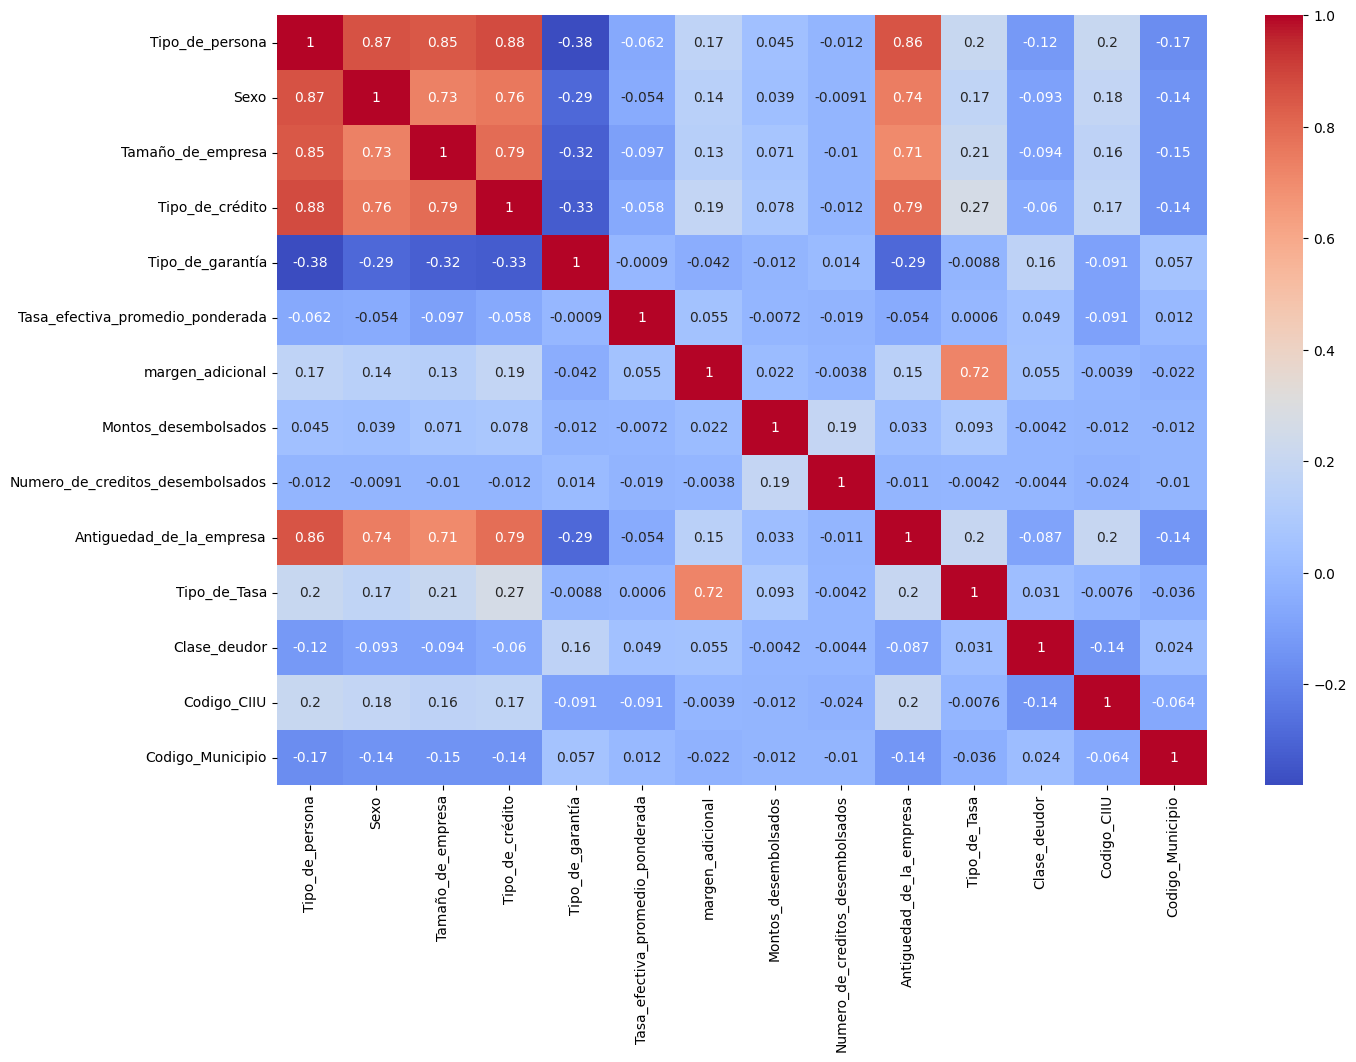

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlacion entre las variables
df_numerico = df_Bancolombia_copia.select_dtypes(exclude=['object'])
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()

## Escalamos los datos

In [ ]:
from sklearn.preprocessing import StandardScaler
# Inicializa el escalador
scaler = StandardScaler()
# Aplica la estandarización a todas las columnas numéricas
df_numerico_escalado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_numerico_escalado.head()


,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1.509684,1.306049,1.984683,1.280228,-0.919494,0.831595,-0.164443,-0.043260,-0.019132,3.226453,-0.189268,-0.217389,1.490610,-0.745434
1,-0.662390,0.095994,-0.574980,-0.624787,-0.919494,0.920385,-0.164443,-0.053190,-0.022851,-0.582135,-0.189268,-0.217389,1.515623,-0.956458
2,-0.662390,0.095994,-0.574980,-0.624787,1.051854,0.831595,-0.164443,-0.053600,-0.024091,-0.582135,-0.189268,-0.217389,0.550691,-0.528887
3,-0.662390,-1.114060,-0.574980,-0.624787,1.051854,-1.315663,-0.164443,-0.006682,0.010619,-0.582135,-0.189268,-0.217389,-1.220437,-0.952416
4,1.509684,1.306049,1.984683,1.280228,-0.919494,0.834405,-0.164443,0.192721,-0.012934,0.687394,-0.189268,-0.217389,1.319366,-0.745434


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_numerico_escalado)
pca_data_scaled = pca.transform(df_numerico_escalado)
pca_data_scaled

array([[ 4.26733572e+00, -1.10469834e+00, -2.15064314e-01, ...,
        -6.88316918e-01, -1.06095316e+00,  5.51077805e-01],
       [-6.18391984e-01, -4.95479697e-01, -2.17934617e-01, ...,
         5.38299615e-01, -7.98238210e-02,  2.79968725e-01],
       [-1.16618839e+00, -3.12875905e-02, -1.00633279e-01, ...,
         4.00598251e-01, -1.56393432e-02,  1.84315381e-01],
       ...,
       [-8.43882111e-01, -2.00819572e-01, -9.10574470e-02, ...,
         5.21557841e-01, -7.95828781e-02,  2.71839129e-01],
       [-1.15834844e+00, -4.93002341e-01,  1.56103976e-01, ...,
        -2.74804209e-01, -4.18371099e-03, -5.94591035e-02],
       [ 2.57106552e+00, -4.59150031e-01, -1.69579437e-02, ...,
         1.56031429e-01,  2.60034835e-01, -2.38753120e-01]])

In [ ]:
var = pca.explained_variance_ratio_
print(var)

[0.32692309 0.11949971 0.08494038 0.07783918 0.0717627  0.06930117
 0.06159667 0.05788937 0.05442571 0.02136132 0.01997478 0.01728005
 0.01271619 0.00448969]


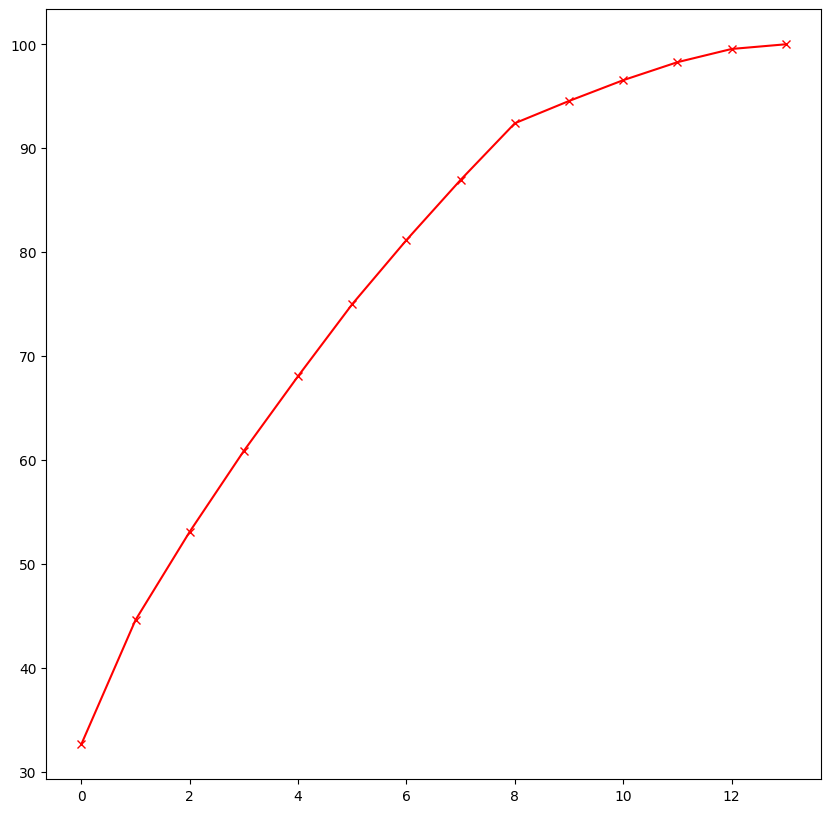

In [ ]:
import numpy as np
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

viendo la grafica nos quedamos con las columnas del 0-7

In [ ]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([8,9,10,11,12,13],axis=1, inplace=True)

In [ ]:
pca_data_standard

,0,1,2,3,4,5,6,7
0,4.267336,-1.104698,-0.215064,0.244957,0.441310,-0.686468,1.165793,-0.185469
1,-0.618392,-0.495480,-0.217935,-0.807030,0.911173,-1.404339,0.879061,-0.029419
2,-1.166188,-0.031288,-0.100633,-0.137444,0.109859,-0.942068,0.962617,-0.012250
3,-1.743969,0.094584,0.326759,-0.251669,-1.245477,-0.581940,-1.429032,0.197899
4,3.212453,-0.914423,0.002735,0.104959,0.590844,-0.762037,0.900763,0.078137
...,...,...,...,...,...,...,...,...
62266,-1.377249,0.280796,0.015280,0.878701,0.327132,-0.812870,-0.333020,0.048775
62267,-1.915210,0.059819,0.098122,-0.595343,-0.801970,1.915475,-0.255610,0.020463
62268,-0.843882,-0.200820,-0.091057,0.113961,1.040008,-0.966642,-0.421585,0.023308
62269,-1.158348,-0.493002,0.156104,-1.382483,-0.461325,-0.513407,-0.819784,0.086224


## Clustering

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-Means
# Con PCA

In [ ]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

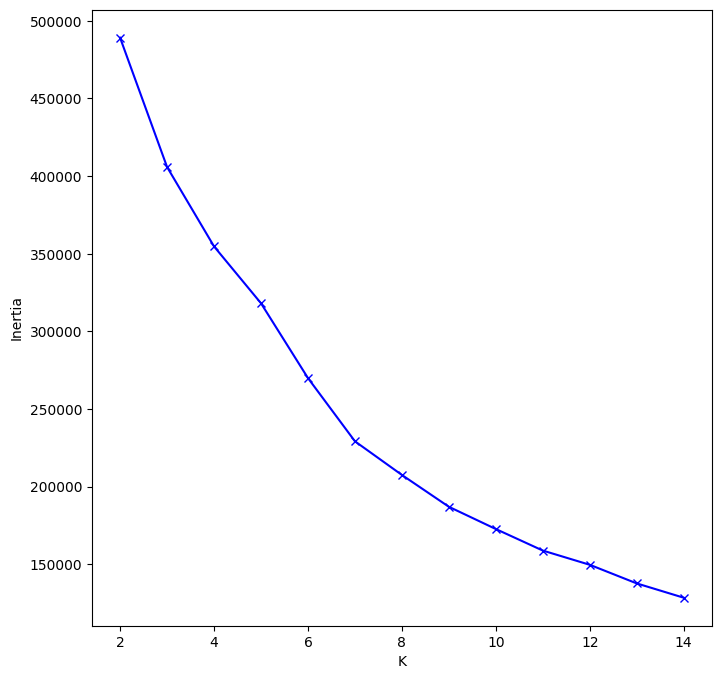

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

posiblemente sean de 4-6 clustering segun la grafica
verificamos graficanfo el coeficiente de silueta

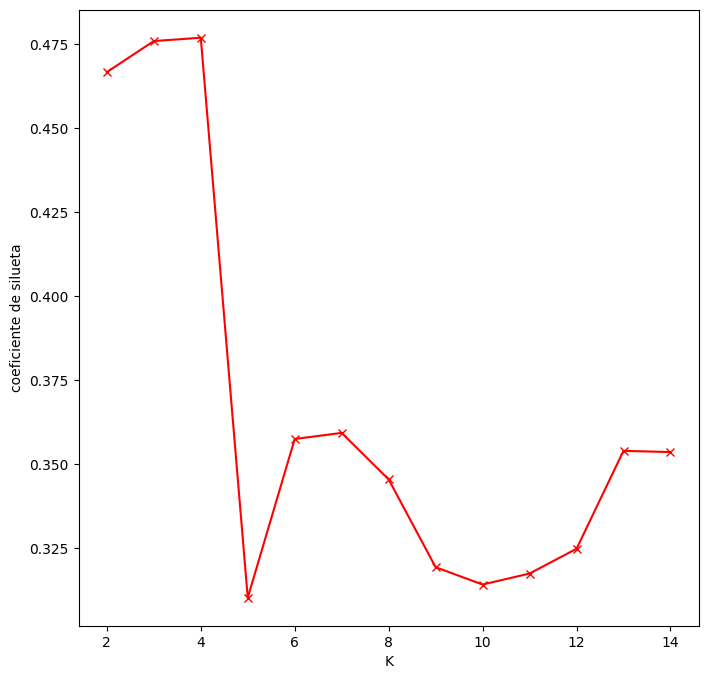

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('coeficiente de silueta')
plt.show()

serian 4 clustering segun la grafica
## Calculamos el coheficiente de Silueta y guardamos los resultados en df_bancombia

In [ ]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_bancolombia['k_means_pca'] = y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.48711056799626007


In [ ]:
df_bancolombia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,1
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,1
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,1
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,0


## K-Means
# Sin PCA

In [ ]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_numerico_escalado)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_numerico_escalado,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

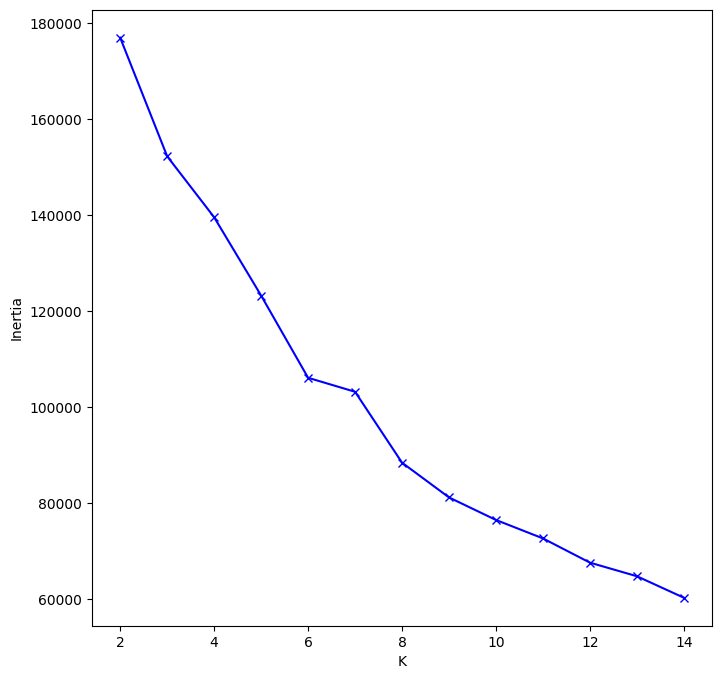

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

segun esta grafica pueden ser 3, graficamos ahora el coeficiente de silueta

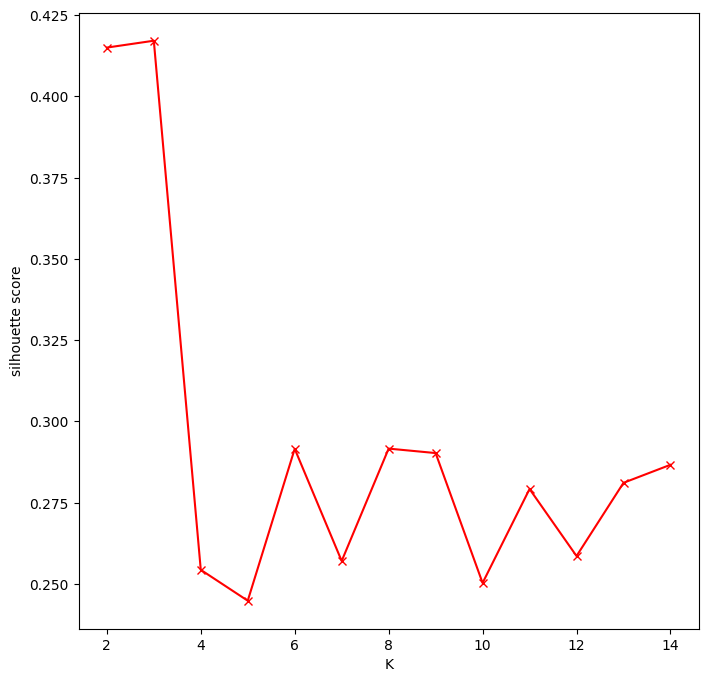

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

en ambas graficas corresponde a 3 Clustering

In [ ]:
km = KMeans(n_clusters = 3)
y = km.fit_predict(df_numerico_escalado)
print(silhouette_score(df_numerico_escalado, y))
df_bancolombia['k_means'] = y
df_bancolombia.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4171035975088336


,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,1,2
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,3,0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,3,0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,0,0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,1,2


El Coeficiente sin pca es mayor que el de Pca
(Con PCA=0.30567287257702686)
(Sin PCA=0.4171035975088336) pero como en el pasado trabajamos con